In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from river import datasets
from river import evaluate
from river import linear_model
from river import metrics
from river import optim
from river import preprocessing

dataset = datasets.Phishing()
optimizer = optim.SGD(0.1)

model = (
    preprocessing.StandardScaler() |
    linear_model.LogisticRegression(optimizer)
)
metric = metrics.F1()

evaluate.progressive_val_score(dataset, model, metric)

c:\Users\leiyo\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\leiyo\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


F1: 87.85%

In [3]:
from src.models.func import CustomFunc
import matplotlib.pyplot as plt
import seaborn as sns

Regret: 23.790418866472596


C:\Users\leiyo\AppData\Local\Temp\ipykernel_14836\933580667.py:13: RuntimeWarning: invalid value encountered in scalar divide
  regret_per_iter_list.append(regret/t)


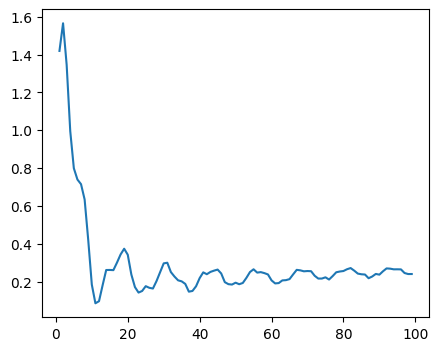

In [4]:
model = CustomFunc(optimizer=optim.FTRLProximal(), w=0.2)
regret = 0
regret_per_iter_list = []

t_values = range(100)
for t in t_values:
    model.learn_one(x={'x':0, 't':t})
    x = model._weights['x']
    fx = model.predict_one({'x': x, 't': t})

    # print(f'f({x}) = {fx}')
    regret += fx
    regret_per_iter_list.append(regret/t)
print(f'Regret: {regret}')

plt.figure(figsize=(5, 4))
plt.plot(t_values, regret_per_iter_list)
plt.show()


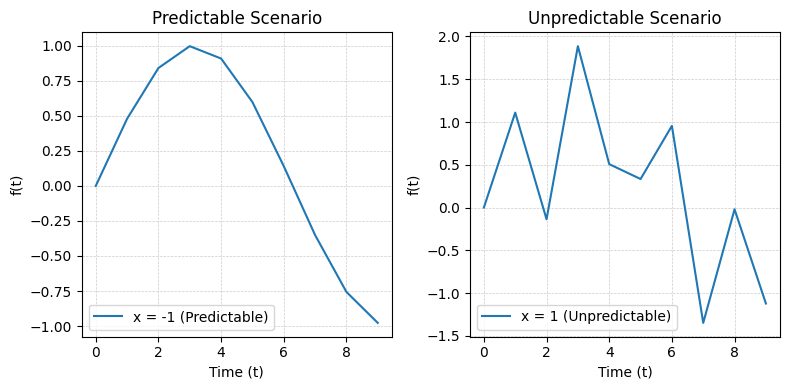

In [5]:
# Instantiate the CustomFunc class
model = CustomFunc(optimizer=optimizer)
x_predictable = -1
x_unpredictable = 0.9
t_values = range(10)

# Generate data using the class
f_values_predictable = [model.predict_one({'x': x_predictable, 't': t}) for t in t_values]
f_values_unpredictable = [model.predict_one({'x': x_unpredictable, 't': t}) for t in t_values]

# Plotting the results
plt.figure(figsize=(8, 4))

plt.style.use('default')

# Set the linewidth and grid appearance
line_width = 1.5
grid_color = '#cccccc'  # Light grey grid lines

# Plotting the predictable data
plt.subplot(1, 2, 1)
plt.plot(t_values, f_values_predictable, label="x = -1 (Predictable)", linewidth=line_width)
plt.grid(True, linestyle='--', linewidth=0.5, color=grid_color)
plt.xlabel('Time (t)')
plt.ylabel('f(t)')
plt.title('Predictable Scenario')
plt.legend()

# Plotting the unpredictable data
plt.subplot(1, 2, 2)
plt.plot(t_values, f_values_unpredictable, label="x = 1 (Unpredictable)", linewidth=line_width)
plt.grid(True, linestyle='--', linewidth=0.5, color=grid_color)
plt.xlabel('Time (t)')
plt.ylabel('f(t)')
plt.title('Unpredictable Scenario')
plt.legend()

plt.tight_layout()
plt.show()